# WeRateDogs Tweet Data Wrangling Project

## by Karma Dolma Gurung <br/>
> This dataset explores tweet archive of Twitter user @dog_rates, also known as WeRateDogs. The archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

In [199]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import json
import re

%matplotlib inline

## Gathering data

Data Source 1: 'twitter-archive-enhanced.csv' file

In [200]:
# Reading the csv files
df_csv = pd.read_csv('twitter-archive-enhanced.csv')


In [201]:
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Data Source 2: 'image_predictions.tsv' file

In [202]:
#Programmatically downloading the image predictions from Udacity's URL using Request's library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('/Users/karmadolmagurung/Desktop/image-predictions.tsv', 'wb').write(r.content);

In [203]:
#Reading the downloaded tsv file
df_tsv = pd.read_csv('image-predictions.tsv')

In [204]:
df_tsv.head()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [205]:
#Parsing the concatenated column
df_tsv = pd.read_csv("image-predictions.tsv",sep="\t",header=0)
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Data Source 3: Extrating data from a JSON text file

In [ ]:
#I did apply for developers account but they were very slow to respond so I used the text file that was provided
#and the code is below
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_csv_copy.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [206]:
tweet_data =[]
with open('tweet-json.txt', 'r') as file:  
    for line in file:
        data = json.loads(line)
        tweet_data.append({'tweet_id' : data['id'], 'retweet_count' : data['retweet_count'], 
                           'favorite_count' : data['favorite_count'], 'retweeted' : data['retweeted'],
                           'full_text' : data['full_text']})
        
df_tweets = pd.DataFrame(tweet_data, columns=['tweet_id', 'retweet_count', 'favorite_count', 'retweeted', 'full_text'])
df_tweets

,tweet_id,retweet_count,favorite_count,retweeted,full_text
0,892420643555336193,8853,39467,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,False,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,False,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,False,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,False,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,False,This is a western brown Mitsubishi terrier. Up...


## Assessing data

> The three dataframes ['df_csv','df_tsv', 'df_tweets'] will be asessed separately and merged as a final step of tidiness.

In [207]:
#Making a copy of each of the dataframes
df_csv_copy = df_csv.copy()
df_tsv_copy = df_tsv.copy()
df_tweets_copy = df_tweets.copy()

In [208]:
df_csv_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [209]:
df_tsv_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [210]:
df_tweets_copy

,tweet_id,retweet_count,favorite_count,retweeted,full_text
0,892420643555336193,8853,39467,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,False,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,False,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,False,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,False,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,False,This is a western brown Mitsubishi terrier. Up...


### Programmatic Assessment

Data Source 1: 'twitter-archive-enhanced.csv' file

In [211]:
df_csv_copy.shape

(2356, 17)

In [212]:
df_csv_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [213]:
df_csv_copy.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [214]:
df_csv_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472...,9,10,Charleson,None,None,None,None


In [215]:
df_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [216]:
df_csv_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [217]:
df_csv_copy['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Eevee        1
Odin         1
Shadoe       1
Kayla        1
Lambeau      1
Name: name, Length: 957, dtype: int64

> There are names which are None as well as a. The correct names are present in the text which will need to be extracted.

In [218]:
#Checking records that have 0 rating_denominator
df_csv_copy.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [219]:
#Checking for records that have highest rating_denominator
df_csv_copy.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [220]:
#Checking the texts of the record which has rating denominator 170
df_csv_copy['text'][1120]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [221]:
#Checking for records that have ratings higher than average rating_denominator
df_csv_copy.query('rating_denominator > 10').shape

(20, 17)

In [222]:
df_csv_copy.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


> It seemed like a quality issue at first for ratings to be 1776. Upon checking one of the tweets (tweet id = 684222868335505415), the ratings were correct and there is no quality issue.

In [223]:
df_csv_copy.isnull().count()

tweet_id                      2356
in_reply_to_status_id         2356
in_reply_to_user_id           2356
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           2356
retweeted_status_user_id      2356
retweeted_status_timestamp    2356
expanded_urls                 2356
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [224]:
df_csv_copy[df_csv_copy.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [225]:
#Checking if there are retweets in the data
df_csv_copy.query('retweeted_status_id != "NaN"').shape

(181, 17)

In [226]:
#Checking if all the tweets are from the account tweet account @WeRateDogs
df_csv['expanded_urls'].astype(str)
reg = "(?<=https://twitter.com/)\D+(?=/status)"
df_csv_copy['expanded_urls'].str.findall(reg).value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[dog_rates]                                                                                 1542
[dog_rates, dog_rates]                                                                       347
[dog_rates, dog_rates, dog_rates, dog_rates]                                                 135
[]                                                                                           115
[dog_rates, dog_rates, dog_rates]                                                            105
[dog_rates, dog_rates, dog_rates, dog_rates, dog_rates, dog_rates]                             6
[dog_rates, dog_rates, dog_rates, dog_rates, dog_rates, dog_rates, dog_rates, dog_rates]       4
[dogratingrating, dogratingrating]                                                             2
[drboondoc]                                                                                    1
[wgnnews]                                                                                      1
[rachaeleasler, rachaeleasler,

From the above we can confirm that not all tweets are from the account @WeRateDogs.

Data Source 2: 'image_predictions.tsv' file

In [227]:
df_tsv_copy.shape

(2075, 12)

In [228]:
df_tsv_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [229]:
df_tsv_copy.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [230]:
df_tsv_copy.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
843,695064344191721472,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False


In [231]:
df_tsv_copy['p1'].value_counts()

golden_retriever            150
Labrador_retriever          100
Pembroke                     89
Chihuahua                    83
pug                          57
                           ... 
skunk                         1
hay                           1
sulphur-crested_cockatoo      1
wild_boar                     1
bow                           1
Name: p1, Length: 378, dtype: int64

In [232]:
df_tsv_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [233]:
df_tsv_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [234]:
df_tsv_copy[df_tsv_copy.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Data Source 3: Extrating data from a JSON text file

In [235]:
df_tweets_copy.shape

(2354, 5)

In [236]:
df_tweets_copy.head()

,tweet_id,retweet_count,favorite_count,retweeted,full_text
0,892420643555336193,8853,39467,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,False,This is Franklin. He would like you to stop ca...


In [237]:
df_tweets_copy.query('retweeted == False').shape

(2354, 5)

In [238]:
df_tweets_copy.tail()

,tweet_id,retweet_count,favorite_count,retweeted,full_text
2349,666049248165822465,41,111,False,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,False,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,False,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,False,This is a western brown Mitsubishi terrier. Up...
2353,666020888022790149,532,2535,False,Here we have a Japanese Irish Setter. Lost eye...


In [239]:
df_tweets_copy.sample(3)

,tweet_id,retweet_count,favorite_count,retweeted,full_text
1576,687317306314240000,10411,22073,False,This is Tyrone. He's a leaf wizard. Self-motiv...
1885,674788554665512960,230,871,False,Say hello to Maggie. She's a Western Septic Do...
364,829011960981237760,18627,58302,False,This is Dexter. He was reunited with his mom y...


In [240]:
df_tweets_copy['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [241]:
df_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   retweeted       2354 non-null   bool  
 4   full_text       2354 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [242]:
df_tweets_copy.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [243]:
df_tweets_copy[df_tweets_copy.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,retweeted,full_text


In [244]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [245]:
df_csv['rating_numerator'].min()

0

In [246]:
df_csv.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


#### Quality

#### df_csv
- Quality: The url links appear duplicated in the column "expanded_urls" and few of the urls contain link to other than twitter.
- Quality: Replace rows with names as "a" with "None"
- Quality: Datatype for "timestamp" and "retweeted_status_timestamp" is an object instead of datetime.
- Quality: Replacing the values "None" in the columns "doggo", "floofer", "pupper" and "puppo" to "".
- Quality: Removing all the rows that are retweets and replies to the tweets.
- Tidiness: Convert "doggo", "floofer", "pupper" and "puppo" into a single column.
- Tidiness: Not visibile in the notebook but visually assessing the data in the spreadsheet shows that the "text" column has the url link to the tweet.
- Quality: Extracting correct numerator and denominator as some have been extracted incorrectly.
- Quality: The rating numerator are greater than 10. They should be only 10.
- Quality: Deleting unwanted columns such as "in_reply_to_status_id ", "in_reply_to_user_id", "retweeted_status_user_id", "retweeted_status_timestamp".


#### df_tsv
- No qualtiy or tidiness issues were observed.

#### df_tweets
- Quality: All the records with the "retweet_count" have "retweeted" as False. If the records have retweeted_count, they will be replace with True.
- Tidiness: Dataframes df_csv and df_tweets will be merged since they have similar number of records.

## Cleaning data

### df_csv

#### Define

There are more than 1 same Twitter links and some of the links are to sites other than Twitter. Extracting the first instance of the link to twitter from 'expanded_urls'.

#### Code

In [247]:
reg = "(?P<url>https:\/\/twitter.com?\/[^\s]+?\/1)"
df_csv_copy['expanded_urls'] = df_csv_copy['expanded_urls'].str.findall(reg)

#### Test

In [248]:
#Testing if the above extraction worked
df_csv_copy['expanded_urls'][6]

['https://twitter.com/dog_rates/status/890971913173991426/photo/1']

#### Define

While visually assessing found that rows 2352, 2353 and 2354 have names as "a". All the records that have names "a" will be changed to "None"

In [249]:
df_csv_copy.iloc[[2352,2353,2354],:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,[https://twitter.com/dog_rates/status/66604422...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,[https://twitter.com/dog_rates/status/66603341...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,[https://twitter.com/dog_rates/status/66602928...,7,10,a,None,None,None,None


In [250]:
#Checking if there are more instances where name is 'a'
df_csv_copy['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Eevee        1
Odin         1
Shadoe       1
Kayla        1
Lambeau      1
Name: name, Length: 957, dtype: int64

#### Code

In [251]:
#Replacing names where a with None
df_csv_copy['name'] = df_csv_copy['name'].replace(['a'], 'None')

#### Test

In [252]:
#Testing if the above worked fine
df_csv_copy.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Changing the datatype for "timestamp" and "retweeted_status_timestamp" from an object to datetime datatype

#### Code

In [253]:
df_csv_copy['timestamp'] =pd.to_datetime(df_csv_copy['timestamp'])
df_csv_copy['retweeted_status_timestamp'] =pd.to_datetime(df_csv_copy['retweeted_status_timestamp']);

#### Test

In [254]:
df_csv_copy.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

In [255]:
#Extracting only the date from the 'time_stamp'
df_csv_copy['date_posted'] = df_csv_copy['timestamp'].dt.date

In [256]:
#Checking if the above worked
df_csv_copy['date_posted']

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: date_posted, Length: 2356, dtype: object

#### Define

Replacing values of "None" in the four columns ['doggo', 'floofer', 'pupper', 'puppo'] with " "

#### Code

In [257]:
df_csv_copy['doggo'] = df_csv_copy['doggo'].replace("None", "")
df_csv_copy['floofer'] = df_csv_copy['floofer'].replace("None", "")
df_csv_copy['pupper'] = df_csv_copy['pupper'].replace("None", "")
df_csv_copy['puppo'] = df_csv_copy['puppo'].replace("None", "")

#### Test

In [258]:
df_csv_copy.query('doggo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date_posted


#### Define

Converting all the four columns ['doggo', 'floofer', 'pupper', 'puppo'] into 1 column called 'stage'

#### Code

In [259]:
#Concatenating the four columns ['doggo', 'floofer', 'pupper', 'puppo']
df_csv_copy['stage'] = df_csv_copy.doggo + df_csv_copy.floofer + df_csv_copy.pupper + df_csv_copy.puppo

In [260]:
df_csv_copy['stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [261]:
#Cleaning some of the values in the new created column 'stage'
df_csv_copy.loc[df_csv_copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_csv_copy.loc[df_csv_copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_csv_copy.loc[df_csv_copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [262]:
#Testing if the above worked as expected
df_csv_copy['stage'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [263]:
#Replacing those columns with no stage as None
df_csv_copy['stage'] = df_csv_copy['stage'].replace("", "None")

In [264]:
#Testing if the above worked as expected
df_csv_copy['stage'].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [265]:
#Removing the original 4 columns,'doggo_stage_x' and 'myValname'
df_csv_copy = df_csv_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1)

In [266]:
#Testing if the above drop worked
df_csv_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date_posted,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,[https://twitter.com/dog_rates/status/89242064...,13,10,Phineas,2017-08-01,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,[https://twitter.com/dog_rates/status/89217742...,13,10,Tilly,2017-08-01,None


#### Define

Removing all rows that are retweets since we are only looking at the tweet data from the @WeRateDogs

#### Code

In [267]:
df_csv_copy = df_csv_copy.query('retweeted_status_id == "NaN" & in_reply_to_status_id == "NaN"')

#### Test

In [268]:
df_csv_copy.query('retweeted_status_id != "NaN" & in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date_posted,stage


#### Define

The 'text' column has texts as well as url links.Extracting the url from the text and saving it in a new column called 'URL'.

#### Code

In [269]:
pat = "(?P<url>https?://[^\s]+)"
df_csv_copy['URL'] = df_csv_copy.text.str.findall(pat)

#### Test

In [270]:
df_csv_copy['URL'][6]

['https://t.co/Zr4hWfAs1H', 'https://t.co/tVJBRMnhxl']

#### Define

The 'rating_numerator' and the 'rating_denominator' have been improperly extracted. Extracting the correct ratings from the 'text' columns and saving it in the dataframe.

#### Code

In [271]:
rating = df_csv_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand = True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating['rating_numerator'] = rating['rating_numerator'].astype(float)
rating['rating_denominator'] = rating['rating_denominator'].astype(float)

df_csv_copy['rating_numerator'] = rating['rating_numerator']
df_csv_copy['rating_denominator'] = rating['rating_denominator']

In [272]:
rating['rating_numerator'][695]

9.75

#### Test

In [273]:
#Testing if the above worked
df_csv_copy.query('tweet_id == 786709082849828864')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date_posted,stage,URL
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,[https://twitter.com/dog_rates/status/78670908...,9.75,10.0,Logan,2016-10-13,None,[https://t.co/yBO5wuqaPS]


#### Define

Deleting unnecessary columns such as "in_reply_to_status_id ", "in_reply_to_user_id", "retweeted_status_user_id",
"retweeted_status_timestamp" as they will not be used for the analysis.

#### Code

In [274]:
df_csv_copy.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id",
                                        "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [275]:
#Testing if the above worked
df_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   date_posted         2097 non-null   object             
 9   stage               2097 non-null   object             
 10  URL                 2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(7)
memory usage: 276.6+ KB


#### Define

The rating_denominators are greater than 10. They need to converted back to 10.

#### Code

In [276]:
df_csv_copy['rating_denominator'] = 10

#### Test

In [277]:
df_csv_copy['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

#### Define

I would like to analyse the highest ratings received so far. To do that, I will divide the rating_numerator with the rating_denominator.

#### Code

In [278]:
df_csv_copy['Ratings'] = df_csv_copy['rating_numerator']/df_csv_copy['rating_denominator']

#### Test

In [279]:
df_csv_copy['Ratings'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: Ratings, Length: 2097, dtype: float64>

### df_tweets

#### Define

All the records with the "retweet_count" have "retweeted" as False. If the records have retweeted_count, it will be replaced with True.

#### Code

In [280]:
df_tweets_copy['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [281]:
df_tweets_copy.loc[:,'retweeted'] = 'True'

In [282]:
df_tweets_copy['retweeted'].value_counts()

True    2354
Name: retweeted, dtype: int64

In [283]:
df_tweets_copy['retweeted'][290] = 'False';

<ipython-input-283-c707db8f9d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_copy['retweeted'][290] = 'False';


#### Test

In [284]:
df_tweets_copy['retweeted'].value_counts()

True     2353
False       1
Name: retweeted, dtype: int64

#### Define

The two dataframes 'df_csv_copy' and 'df_tweets_copy' have similar number of records. 'df_csv_copy' has 2356 records whereas 'df_tweets' has 2354 records. Therefore, merging these two dataframes for analysis.

#### Code

In [285]:
df_concat = pd.concat([df_csv_copy, df_tweets_copy], axis=1)

#### Test

In [286]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   float64            
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   date_posted         2097 non-null   object             
 9   stage               2097 non-null   object             
 10  URL                 2097 non-null   object             
 11  Ratings             2097 non-null   float64            
 12  tweet_id            2354 non-null 

#### Define

Remove duplicate columns such as 'tweet_id' and 'full_text' from the concatenated dataframes

#### Code

In [287]:
#Removing the 11th column i.e tweet_id
df_concat = df_concat.loc[:,~df_concat.columns.duplicated()]

#### Test

In [288]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   float64            
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   date_posted         2097 non-null   object             
 9   stage               2097 non-null   object             
 10  URL                 2097 non-null   object             
 11  Ratings             2097 non-null   float64            
 12  retweet_count       2354 non-null 

## Analysing

### Exploratory Analysis

With this exploratory analysis, following features will be explored:
- No. of postings made over time.
- Outliers if there are any for rating_numerator and rating_denominator.
- Highest Ratings Received by Dog.
- Highest Retwee Counts Received by Dog.

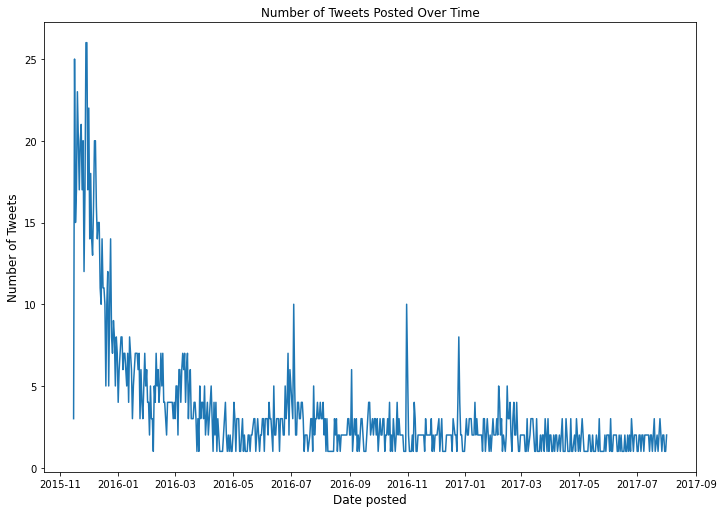

In [289]:
#Plotting line chart for date posted
plt.figure(figsize=[ 11.69, 8.27])
df_concat.groupby('date_posted').tweet_id.nunique().plot()
plt.xlabel('Date posted',fontsize=12)
plt.ylabel('Number of Tweets',fontsize=12)
plt.title('Number of Tweets Posted Over Time',fontsize=12)
plt.savefig('Number of Tweets Poster Over Time');

The line chart shows the activity of the @WeRateDogs over time. As seen from the above line chart, there has been decrease in the no. of postings over time. The account was more active posting tweets during late 2015 and early 2016. The highest number of tweets posted by the account is approximately 27. 

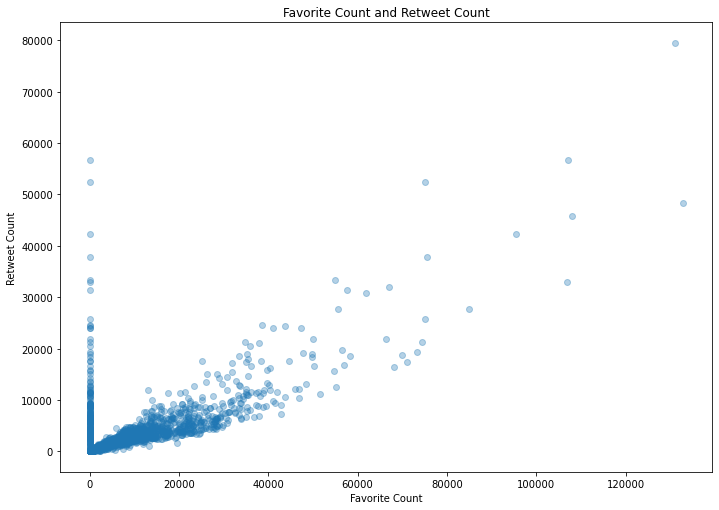

In [290]:
#Plotting scatterplots to check outliers
plt.figure(figsize=[11.69, 8.27])
sb.regplot(data = df_concat, x = 'favorite_count', y = 'retweet_count', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title('Favorite Count and Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.savefig('Favorite Count and Retweet Count');

The scatter plot has been constructed with the favorite count along the x-axis and retweet count along the y-axis. Few outliers were observed which can distort our analysis. For the purpose of our analysis, these outliers will not be removed as we would like to visualise those with the highest receiver of ratings and count.

In [291]:
#Sorting the ratings in descending order and only taking Top 50 highest rating
df_group = df_concat.query('name != "None"')
df_group = df_group.sort_values(by='Ratings', ascending=False).head(10)

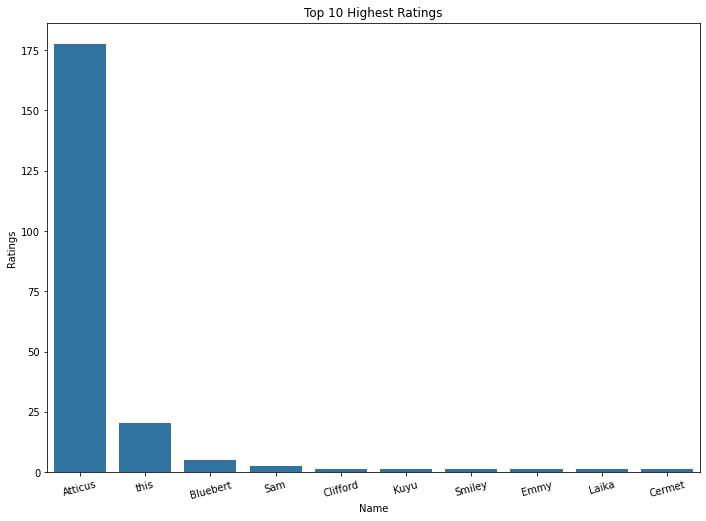

In [292]:
#Visualising using a bar chart for the highest ratings
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0]
sb.barplot(data=df_group, x='name', y='Ratings', color=base_color)
plt.xticks(rotation=15)
plt.title('Top 10 Highest Ratings')
plt.xlabel('Name')
plt.ylabel('Ratings')
plt.savefig('Top 10 Highest Ratings');

The bar chart has been plotted against ratings which is the results of rating_numerator divided by rating_denominator. Only top 10 ratings were visualised since there are many unique names and visualising all the names could crowd the bar chart. Therefore, only top 10 ratings were displayed. From the bar chart, it can seen that the higest rating receiver goes by the name of Atticus who received a rating of 175.

In [293]:
#Sorting the retweet_count in descending order and only taking Top 50 highest retweet_counts
df_group = df_concat.query('name != "None"')
df_group = df_group.sort_values(by='retweet_count', ascending=False).head(10)

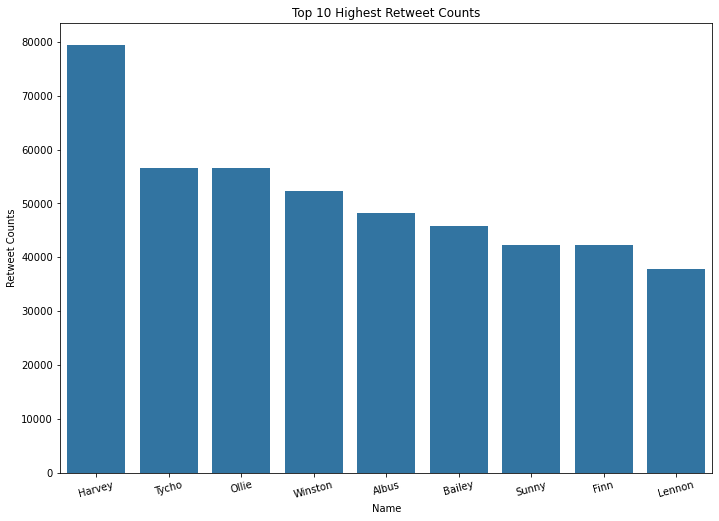

In [294]:
#Visualising using a bar chart for the highest retweet_count
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0]
sb.barplot(data=df_group, x='name', y='retweet_count', color=base_color)
plt.xticks(rotation=15)
plt.title('Top 10 Highest Retweet Counts')
plt.xlabel('Name')
plt.ylabel('Retweet Counts')
plt.savefig('Top 10 Highest Retweet Counts');

Retweet counts can signify the popularity of the tweets and therefore, also an important metrics for engagement.
From the above bar chart, it can be seen that Harvey received the highest retweet counts: a total of close to 80000 retweets.

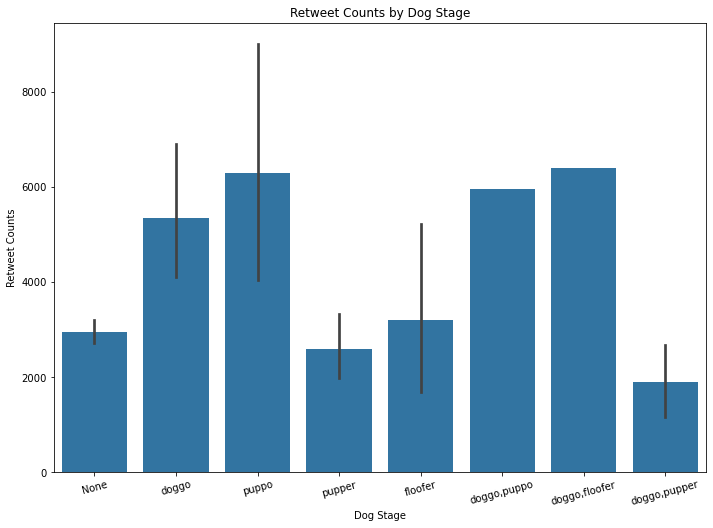

In [295]:
#Visualising the number of retweet_counts by dog stage
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0]
sb.barplot(data=df_concat, x='stage', y='retweet_count', color=base_color)
plt.xticks(rotation=15)
plt.title('Retweet Counts by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Counts');

I wanted to check if there were certain stages of dogs that were popular among the audiences. From the above bar chart, it can bee seen that the most popular retweeted dogs were at the stage "puppo" and "doggo,floofer".

All in all, I think there were other features that could be visualised too but I only added 4 to keep it short and sweet and find out some of the interesting stuffs that I was curious about. So far we know that the account has been maintaing a steady postings over the months following 2016. Atticus received the highest ratings however, Harvey was more popular among the audiences. Last but not least, the stage of dogs that were popular among audiences were puppo and doggo,floofer.

In [296]:
#Saving the dataframe "df_concat" to a csv file
#Not saving the image_predictions.tsv file since there hasn't been any changes to it 
df_concat.to_csv('twitter_archive_master.csv', index=False)

## Conclusion

#### Gathering the data 
The project contains data from three different data sources. The first was from the "twitter-archive-enhanced.csv"; second from the "image-predictions.tsv" and the third from the "tweet-json.txt" collected via API. For the purpose of this analysis, I did not collect the txt file from Twitter's API. I had to use the one that was already available for our analysis.

#### Assessing the data
All three data were assessed one at a time; both visually and programmatically. I also relied on the spreadsheet to visually assess the data specially for csv and tsv file since some of the texts were not easily readable due to the length of the strings. I was able to identify several quality issues visually. Some of them are 

df_csv
- Quality: The url links appear duplicated in the column "expanded_urls" and few of the urls contain link to other than twitter.
- Quality: Replace rows with names as "a" with "None"
- Quality: Replacing the values "None" in the columns "doggo", "floofer", "pupper" and "puppo" to "".
- Tidiness: Convert "doggo", "floofer", "pupper" and "puppo" into a single column.
- Quality: Deleting unwanted columns such as "in_reply_to_status_id ", "in_reply_to_user_id", "retweeted_status_user_id", "retweeted_status_timestamp"

df_tweets
- Tidiness: Dataframes df_csv and df_tweets will be merged since they have similar number of records.

Programmatic assessment included identifying any quality issues with the use of functions like "head()", "tail()", "sample()", "info", "describe()" and "value_counts". Some of the issues identified via the programmatic assessment are as follows:

df_csv
- Quality: Datatype for "timestamp" and "retweeted_status_timestamp" is an object instead of datetime.
- Quality: Removing all the rows that are retweets and replies to the tweets.
- Quality: Extracting correct numerator and denominator as some have been extracted incorrectly.
- Tidiness: Not visible in the notebook but visually assessing the data in the spreadsheet shows that the "text" column has the url link to the tweet.

df_tweets
- Quality: All the records with the "retweet_count" have "retweeted" as False. If the records have retweeted_count, they will be replace with True.

The two dataframes "df_csv" and "df_tweets" were combines and a new dataframe df_concat was created. This was because those were the two dataframes that had similar number of rows while also concating the third dataframe "df_tsv" would have resulted in loss of quite few data.

#### Cleaning the data
Cleaning the data involved correcting the quality and tidiness issues identified from my preliminary assessment. I had to heavily rely on the Knowledge Forum especially for extracting the correct numerators and denominators from the text column in the csv files. I also used regex patterns heavily to extract the required substring from the columns especially for the issue on url links duplication. 

#### Exploratory Analysis
Even after having cleaned the data, there were still some quality issues. While conducting exploratory analysis, I discovered that the rating_numerators were numbers other than 10. This was tackled after identification.

## References
- https://macxima.medium.com/python-extracting-urls-from-strings-21dc82e2142b
- https://knowledge.udacity.com/questions/151631
- https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns